In [ ]:
!pip install langchain-community
!pip install openai

import os
import time
from bs4 import BeautifulSoup
import re
import requests
import warnings

import langchain
from langchain.llms import OpenAI
from langchain.agents import load_tools, AgentType, Tool, initialize_agent
os.environ["OPENAI_API_KEY"] = "sk-y1Cl0XQAdlFtB_SCH2m2KGtPnIU8QT5oyXjavvYq78T3BlbkFJ-tLSXRmGlF3G_k1Q8LNg1Hp8Jct1TfssXqJFttXioA"

warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00


In [ ]:
!pip install -U duckduckgo-search
from langchain.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

search("Stock news India")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.3 MB/s eta 0:00:00


"Markets Live: Indian markets are likely remain cautious following the lower overnight close on the Wall Street. However, better macroeconomic data is expected to provide some support to the markets Stock market today: Indian equity benchmark indices, BSE Sensex and Nifty50, opened in red on Friday. While BSE Sensex was below 81,100, Nifty50 was near 24,500. The technical view suggests continued sideways movement in Nifty. (AI image) Stock Market News: Share Market Today: India stock market news, world share market news and updates on Mint. Indian investors, Sensex latest updates. India\\'s leading finance and business news site for Live Stock Market Updates - Nifty, Sensex and other benchmark indices such as latest Share Prices, Commodity prices, USD-INR and other currencies rates, real time Global indices - DAX, Hang Seng, Taiwan Weighted, Nasdaq and many more. Business News: Get the latest Business News, Live share, stock market updates and top news from India and across the world. 

In [ ]:
# Upgrade OpenAI and LangChain libraries
!pip install --upgrade openai langchain
!pip install -U duckduckgo-search
!pip install openai==0.28
# Restart the runtime after running the above commands.

# After restarting, import the necessary libraries
import openai
from langchain.llms import OpenAI
from langchain.agents import load_tools, AgentType, Tool, initialize_agent

# Set your OpenAI API key
openai.api_key = "sk-y1Cl0XQAdlFtB_SCH2m2KGtPnIU8QT5oyXjavvYq78T3BlbkFJ-tLSXRmGlF3G_k1Q8LNg1Hp8Jct1TfssXqJFttXioA"


# Example usage with OpenAI's ChatCompletion
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user", "content": "Hello!"}
    ]
)

print(response.choices[0].message['content'])


# If you're using LangChain's agent
# Initialize LangChain agent as per your project requirements
# For example:
# tools = load_tools(["some_tool"])
# agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)
# agent.run("Is Bajaj Finance a good investment choice right now?")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.3/390.3 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.54.5
    Uninstalling openai-1.54.5:
      Successfully uninstalled openai-1.54.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.57.4
    Uninstalling openai-1.57.4:
      Successfully uninstalled openai-1.57.4
Hello! How can I assist you today?


In [ ]:
!pip install openai==0.28.0
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, AgentType
from langchain.tools import DuckDuckGoSearchResults  # Example of a tool, replace with your tools

# Initialize the model with OpenAI API key
llm = ChatOpenAI(
    openai_api_key="sk-y1Cl0XQAdlFtB_SCH2m2KGtPnIU8QT5oyXjavvYq78T3BlbkFJ-tLSXRmGlF3G_k1Q8LNg1Hp8Jct1TfssXqJFttXioA",  # replace with your actual OpenAI API key
    model="gpt-3.5-turbo"
)

# Define your tools (example using DuckDuckGo search, replace with your actual tools)
tools = [DuckDuckGoSearchResults()]

# Initialize the agent with the tools and model
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Query the agent
response = agent("Is Bajaj Finance a good investment choice right now?")
print(response)





> Entering new AgentExecutor chain...
It's important to consider the current financial status and market trends of Bajaj Finance.
Action: duckduckgo_results_json
Action Input: Bajaj Finance investment analysis
Observation: snippet: Bajaj Finance (BAF) ended its eight-year-long co-branded credit card partnership with RBL, as per exchange filing. We retain BUY with a TP of INR 8,500, valuing the standalone business at 4.7x FY26E BVPS while assigning INR 1,450/share towards housing subs. ... Axis Annual Analysis:Bajaj Finance Axis Direct We reiterate our BUY recommendation ..., title: Bajaj Finance Ltd. Brokerage/Research Reports, analyst ... - Trendlyne, link: https://trendlyne.com/research-reports/stock/150/BAJFINANCE/bajaj-finance-ltd/, snippet: Bajaj Finance Limited: Trading strategies, financial analysis, commentaries and investment guidance for Bajaj Finance Limited Stock | NSE India S.E.: BAJFINANCE | NSE India S.E., title: Bajaj Finance Limited: Fundamental Analysis and Financia

### Defining the custom Tools

In [ ]:
import yfinance as yf

# Fetch stock data from Yahoo Finance

def get_stock_price(ticker,history=5):
    # time.sleep(4) #To avoid rate limit error
    if "." in ticker:
        ticker=ticker.split(".")[0]
    ticker=ticker+".NS"
    stock = yf.Ticker(ticker)
    df = stock.history(period="1y")
    df=df[["Close","Volume"]]
    df.index=[str(x).split()[0] for x in list(df.index)]
    df.index.rename("Date",inplace=True)
    df=df[-history:]
    # print(df.columns)

    return df.to_string()

print(get_stock_price("TITAN"))

                  Close   Volume
Date                            
2024-12-09  3468.199951   926422
2024-12-10  3475.750000  1063355
2024-12-11  3473.100098   554702
2024-12-12  3445.750000   926472
2024-12-13  3508.850098  1242351


### Custom tools

In [ ]:
from langchain.agents import initialize_agent

zero_shot_agent=initialize_agent(
    llm=llm,
    agent="zero-shot-react-description",
    tools=tools,
    verbose=True,
    max_iteration=4,
    return_intermediate_steps=True,
    handle_parsing_errors=True
)



In [ ]:
import openai

import os
os.environ["OPENAI_API_KEY"] = "sk-y1Cl0XQAdlFtB_SCH2m2KGtPnIU8QT5oyXjavvYq78T3BlbkFJ-tLSXRmGlF3G_k1Q8LNg1Hp8Jct1TfssXqJFttXioA"
openai.api_key="sk-y1Cl0XQAdlFtB_SCH2m2KGtPnIU8QT5oyXjavvYq78T3BlbkFJ-tLSXRmGlF3G_k1Q8LNg1Hp8Jct1TfssXqJFttXioA"


In [ ]:
from langchain.llms import OpenAI

llm=OpenAI(temperature=0,
           model="gpt-3.5-turbo-16k")

In [ ]:
#Openai function calling

import json
function=[
        {
        "name": "get_company_Stock_ticker",
        "description": "This will get the indian NSE/BSE stock ticker of the company",
        "parameters": {
            "type": "object",
            "properties": {
                "ticker_symbol": {
                    "type": "string",
                    "description": "This is the stock symbol of the company.",
                },

                "company_name": {
                    "type": "string",
                    "description": "This is the name of the company given in query",
                }
            },
            "required": ["company_name","ticker_symbol"],
        },
    }
]



def get_stock_ticker(query):
    response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            temperature=0,
            messages=[{
                "role":"user",
                "content":f"Given the user request, what is the comapany name and the company stock ticker ?: {query}?"
            }],
            functions=function,
            function_call={"name": "get_company_Stock_ticker"},
    )
    message = response["choices"][0]["message"]
    arguments = json.loads(message["function_call"]["arguments"])
    company_name = arguments["company_name"]
    company_ticker = arguments["ticker_symbol"]
    return company_name,company_ticker

get_stock_ticker("How is ths stock of Paytm doing?")

('Paytm', 'PAYTM')

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Setting up visualization styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Fetch stock data directly using yfinance
company_data = {}
for stock in tech_list:
    company_data[stock] = yf.download(stock, start=start, end=end)

# Combine the data into a single DataFrame
company_list = [company_data['AAPL'], company_data['GOOG'], company_data['MSFT'], company_data['AMZN']]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, name in zip(company_list, company_name):
    company["company_name"] = name

# Concatenate all company data into a single DataFrame
df = pd.concat(company_list, axis=0)

# Check the last 10 rows
print(df.tail(10))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price      Adj Close Close High  Low Open Volume company_name Adj Close Close  \
Ticker          AAPL  AAPL AAPL AAPL AAPL   AAPL                   GOOG  GOOG   
Date                                                                            
2024-12-02       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-03       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-04       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-05       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-06       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-09       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-10       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-11       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-12       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-13       NaN   NaN  

In [ ]:
import yfinance as yf
from datetime import datetime

# Define the tech stock list, start date, and end date
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
start = datetime(2020, 1, 1)
end = datetime(2024, 1, 1)

# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_returns = closing_df.pct_change()

print(tech_returns.head())


[*********************100%***********************]  4 of 4 completed


Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2020-01-02       NaN       NaN       NaN       NaN
2020-01-03 -0.009722 -0.012139 -0.004907 -0.012452
2020-01-06  0.007968  0.014886  0.024657  0.002585
2020-01-07 -0.004703  0.002092 -0.000624 -0.009118
2020-01-08  0.016086 -0.007809  0.007880  0.015928


[*********************100%***********************]  4 of 4 completed


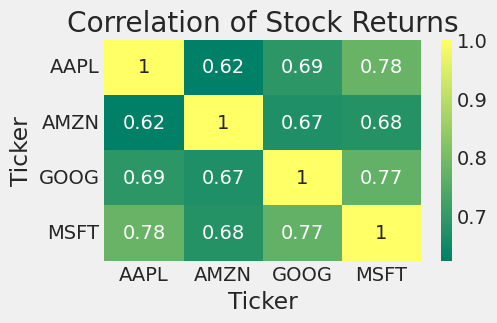

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Define the tech stock list, start date, and end date
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
start = datetime(2020, 1, 1)
end = datetime(2024, 1, 1)

# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Calculate the returns
tech_returns = closing_df.pct_change()

# Plotting the correlation of stock returns
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.heatmap(tech_returns.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Returns')
plt.show()


[*********************100%***********************]  1 of 1 completed


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 0.0233
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 4.1130e-04
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 3.6936e-04
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 3.1252e-04
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 3.3019e-04
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - loss: 3.3158e-04
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 2.7906e-04
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 2.5272e-04
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 2.5683e-04
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 3.1427e-04
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


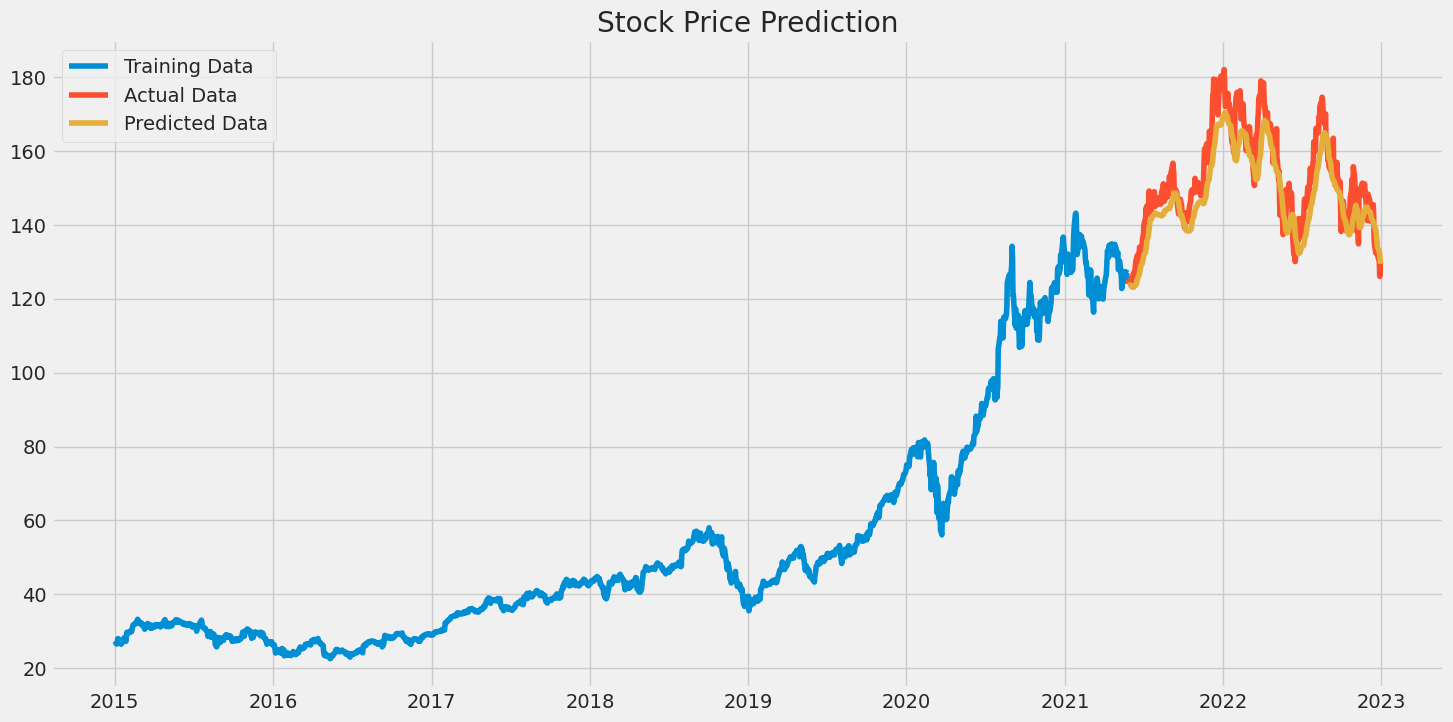

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Step 1: Fetch stock data using yfinance
ticker = "AAPL"  # Replace with the stock ticker of your choice
df = yf.download(ticker, start="2015-01-01", end="2023-01-01")

# Step 2: Preprocessing the data
# Only use the 'Close' column for predictions
data = df[['Close']]
data = data.dropna()  # Remove any missing values

# Scale the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 3: Prepare the training dataset
training_data_len = int(len(scaled_data) * 0.8)  # 80% training data
train_data = scaled_data[:training_data_len]

x_train = []
y_train = []

# Create sequences for LSTM
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Last 60 days
    y_train.append(train_data[i, 0])      # Next day's value

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Step 4: Build and train the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=10)

# Step 5: Test the model
test_data = scaled_data[training_data_len-60:]
x_test = []
y_test = data[training_data_len:].values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Reverse scaling

# Step 6: Visualize the results
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title("Stock Price Prediction")
plt.plot(train['Close'], label="Training Data")
plt.plot(valid['Close'], label="Actual Data")
plt.plot(valid['Predictions'], label="Predicted Data")
plt.legend()
plt.show()


In [ ]:
# Script to scrap top5 googgle news for given company name

def google_query(search_term):
    if "news" not in search_term:
        search_term=search_term+" stock news"
    url=f"https://www.google.com/search?q={search_term}&cr=countryIN"
    url=re.sub(r"\s","+",url)
    return url

def get_recent_stock_news(company_name):
    # time.sleep(4) #To avoid rate limit error
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

    g_query=google_query(company_name)
    res=requests.get(g_query,headers=headers).text
    soup=BeautifulSoup(res,"html.parser")
    news=[]
    for n in soup.find_all("div","n0jPhd ynAwRc tNxQIb nDgy9d"):
        news.append(n.text)
    for n in soup.find_all("div","IJl0Z"):
        news.append(n.text)


    if len(news)>6:
        news=news[:4]
    else:
        news=news
    news_string=""
    for i,n in enumerate(news):
        news_string+=f"{i}. {n}\n"
    top5_news="Recent News:\n\n"+news_string

    return top5_news


print(get_recent_stock_news("Asian paints"))

Recent News:

0. Asian Paints Share Price Live Updates: Asian Paints sees modest gain today
1. Asian Paints Share Price Highlights : Asian Paints closed today at ₹2407.05, up 0.76% from yesterday's ₹2388.95 | Stock Market News
2. Asian Paints shares rise on bourses; here's what driving rally in stock
3. Asian Paints share price gains after LIC raises stake in Raamdeo Agrawal's next ‘Bruised Bluechip’ target | Stock Market News



In [ ]:
# Fetch financial statements from Yahoo Finance

def get_financial_statements(ticker):
    # time.sleep(4) #To avoid rate limit error
    if "." in ticker:
        ticker=ticker.split(".")[0]
    else:
        ticker=ticker
    ticker=ticker+".NS"
    company = yf.Ticker(ticker)
    balance_sheet = company.balance_sheet
    if balance_sheet.shape[1]>=3:
        balance_sheet=balance_sheet.iloc[:,:3]    # Remove 4th years data
    balance_sheet=balance_sheet.dropna(how="any")
    balance_sheet = balance_sheet.to_string()

    # cash_flow = company.cash_flow.to_string()
    # print(balance_sheet)
    # print(cash_flow)
    return balance_sheet
print(get_financial_statements("TATAPOWER.NS"))

                                                                           2024-03-31       2023-03-31       2022-03-31
Ordinary Shares Number                                                   3195339547.0     3196991847.0     3196991847.0
Share Issued                                                             3195339547.0     3196991847.0     3196991847.0
Net Debt                                                               461555600000.0   447847600000.0   445128500000.0
Total Debt                                                             536895400000.0   529230900000.0   511952100000.0
Tangible Book Value                                                    291385400000.0   255477800000.0   192170700000.0
Invested Capital                                                       818351900000.0   777619500000.0   700316500000.0
Working Capital                                                       -127861500000.0  -130012100000.0  -141013900000.0
Net Tangible Assets                     

In [ ]:
# Making tool list

tools=[
    Tool(
        name="get stock data",
        func=get_stock_price,
        description="Use when you are asked to evaluate or analyze a stock. This will output historic share price data. You should input the the stock ticker to it "
    ),
    Tool(
        name="DuckDuckGo Search",
        func=search.run,
        description="Use only when you need to get NSE/BSE stock ticker from internet, you can also get recent stock related news. Dont use it for any other analysis or task"
    ),
    Tool(
        name="get recent news",
        func=get_recent_stock_news,
        description="Use this to fetch recent news about stocks"
    ),

    Tool(
        name="get financial statements",
        func=get_financial_statements,
        description="Use this to get financial statement of the company. With the help of this data companys historic performance can be evaluaated. You should input stock ticker to it"
    )


]

In [ ]:
def Anazlyze_stock(query):
    #agent.run(query) Outputs Company name, Ticker
    Company_name,ticker=get_stock_ticker(query)
    print({"Query":query,"Company_name":Company_name,"Ticker":ticker})
    stock_data=get_stock_price(ticker,history=10)
    stock_financials=get_financial_statements(ticker)
    stock_news=get_recent_stock_news(Company_name)

    # available_information=f"Stock Price: {stock_data}\n\nStock Financials: {stock_financials}\n\nStock News: {stock_news}"
    available_information=f"Stock Financials: {stock_financials}\n\nStock News: {stock_news}"

    print("\n\nAnalyzing.....\n")
    analysis=llm(f"Give detail stock analysis, Use the available data and provide investment recommendation. \
             The user is fully aware about the investment risk, dont include any kind of warning like 'It is recommended to conduct further research and analysis or consult with a financial advisor before making an investment decision' in the answer \
             User question: {query} \
             You have the following information available about {Company_name}. Write (5-8) pointwise investment analysis to answer user query, At the end conclude with proper explaination.Try to Give positives and negatives  : \
              {available_information} "
             )
    print(analysis)

    return analysis

In [ ]:
print(zero_shot_agent.agent.llm_chain.prompt.template)


Answer the following questions as best you can. You have access to the following tools:

duckduckgo_results_json - A wrapper around Duck Duck Go Search. Useful for when you need to answer questions about current events. Input should be a search query.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [duckduckgo_results_json]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


In [ ]:
#Adding predefine evaluation steps in the agent Prompt

new_prompt="""You are a financial advisor. Give stock recommendations for given query.
Everytime first you should identify the company name and get the stock ticker symbole for indian stock.
Answer the following questions as best you can. You have access to the following tools:

get stock data: Use when you are asked to evaluate or analyze a stock. This will output historic share price data. You should input the the stock ticker to it
DuckDuckGo Search: Use only when you need to get NSE/BSE stock ticker from internet, you can also get recent stock related news. Dont use it for any other analysis or task
get recent news: Use this to fetch recent news about stocks
get financial statements: Use this to get financial statement of the company. With the help of this data companys historic performance can be evaluaated. You should input stock ticker to it

steps-
Note- if you fail in satisfying any of the step below, Just move to next one
1) Get the company name and search for the "company name + NSE/BSE stock ticker" on internet. Dont hallucinate extract stock ticker as it is from the text. Output- stock ticker
2) Use "get stock data" tool to gather stock info. Output- Stock data
3) Get company's historic financial data using "get financial statements". Output- Financial statement
4) Use this "get recent news" tool to search for latest stock realted news. Output- Stock news
5) Analyze the stock based on gathered data and give detail analysis for investment choice. provide numbers and reasons to justify your answer. Output- Detailed stock Analysis

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do, Also try to follow steps mentioned above
Action: the action to take, should be one of [get stock data, DuckDuckGo Search, get recent news, get financial statements]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question
Begin!

Question: {input}
Thought:{agent_scratchpad}"""



In [ ]:
#Setting up new prompt
zero_shot_agent.agent.llm_chain.prompt.template=new_prompt


In [ ]:
response =agent({"input": "Shall I invest in Asian paints?"})

print(response)




> Entering new AgentExecutor chain...
Before making any investment decisions, it's important to gather information about the company and its current standing in the market.
Action: duckduckgo_results_json
Action Input: Asian Paints stock performance
Observation: snippet: Asian Paints share price now stands at an average of Rs. 2362.25. Judging by last week's performance, stock is in down trend. Asian Paints has a median target price of Rs. 2670.94 in 12 months by 33 analysts., title: Asian Paints Share Price Today, Asian Paints Stock Price Live NSE/BSE ..., link: https://economictimes.indiatimes.com/asian-paints-ltd/stocks/companyid-14034.cms, snippet: Asian Paints' market cap declines by Rs 5,694 crore as stock falls 2.39%. Asian Paints Limited's stock declined by 2.39% on November 12, 2024, reaching Rs 2,482.30 from its previous close of Rs 2,543.10. This drop resulted in a reduction of the company's market capitalizati..., title: Asian Paints Limited (NSE: ASIANPAINT) - Stock Anal

In [ ]:
response =agent({"input": "Shall I invest in Adani power right now?"})

print(response)





> Entering new AgentExecutor chain...
Before making any investment decisions, it's important to gather information on the current status of Adani Power.
Action: duckduckgo_results_json
Action Input: Adani Power stock
Observation: snippet: Adani Power Ltd., incorporated in the year 1996, is a Large Cap company (having a market cap of Rs 2,06,963.34 Crore) operating in Power sector. Adani Power Ltd. key Products/Revenue Segments include Coal, Income From Power Supply, Sale of services for the year ending 31-Mar-2022.For the quarter ..., title: Adani Power Share Price Today, Adani Power Stock Price Live NSE/BSE ..., link: https://economictimes.indiatimes.com/adani-power-ltd/stocks/companyid-23479.cms, snippet: Get the latest stock price, news and analysis of Adani Power Limited (NSE: ADANIPOWER), a leading power generation company in India. See the market cap, revenue, net income, EPS, PE ratio, dividend, earnings date and more., title: Adani Power Limited (NSE: ADANIPOWER) - Stock Anal

In [ ]:
response =agent({"input": "Is it a good time to investBan in Yes k?"})

print(response)




> Entering new AgentExecutor chain...
Consider researching the current market trends and economic indicators before making a decision.
Action: duckduckgo_results_json
Action Input: "current stock market trends"
Observation: snippet: STOCK MARKET TODAY. With regular updates throughout each trading session, the Stock Market Today column highlights the latest stock market news and alerts you to any changes in market trend., title: Stock Market Today: Stock Market News And Analysis, link: https://www.investors.com/news/stock-market-today-stock-market-news/, snippet: NEW YORK (AP) — U.S. stock indexes got back to climbing on Wednesday after the latest update on inflation appeared to clear the way for more help for the economy from the Federal Reserve.. The S&P 500 rose 0.8% to break its first two-day losing streak in nearly a month and finished just short of its all-time high. Big Tech stocks led the way, which drove the Nasdaq composite up 1.8% to top ..., title: Stock market today: Wall

In [ ]:
response =agent({"input": "what is the profit rate of amezon?"})

print(response)



> Entering new AgentExecutor chain...
I should use the Duck Duck Go Search tool to find the current profit rate of Amazon.
Action: duckduckgo_results_json
Action Input: Amazon profit rate
Observation: snippet: Amazon.com, Inc. (NASDAQ:AMZN) today announced financial results for its third quarter ended September 30, 2024. Net sales increased 11% to $158.9 billion in the third quarter, compared with $143.1 billion in third quarter 2023. Excluding the $0.2 billion unfavorable impact from year-over-year changes in foreign exchange rates throughout the quarter, net sales increased 11% compared with third ..., title: Amazon.com, Inc. - Amazon.com Announces Third Quarter Results, link: https://ir.aboutamazon.com/news-release/news-release-details/2024/Amazon.com-Announces-Third-Quarter-Results/, snippet: Amazon.com, Inc. (NASDAQ: AMZN) today announced financial results for its fourth quarter ended December 31, 2023. Fourth Quarter 2023 Net sales increased 14% to $170.0 billion in the fourth 

In [ ]:
pip install --upgrade yfinance pandas_datareader


In [ ]:

llm=OpenAI(temperature=0,
           model_name="gpt-3.5-turbo-16k-0613")

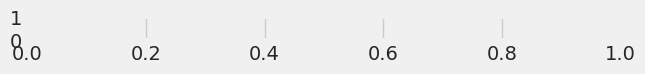

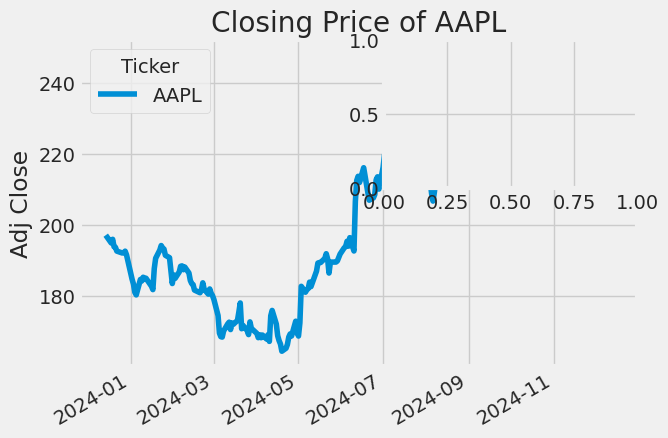

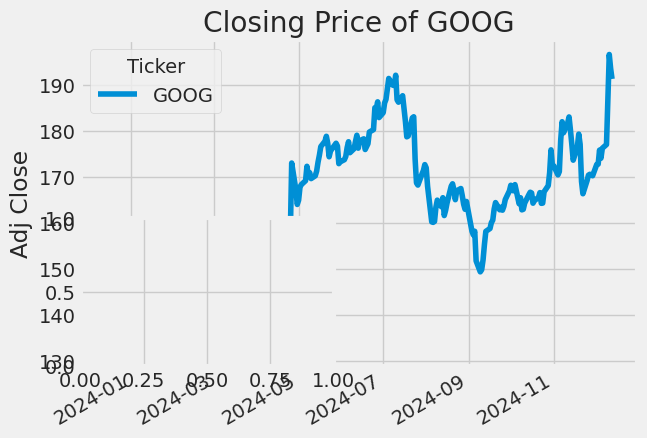

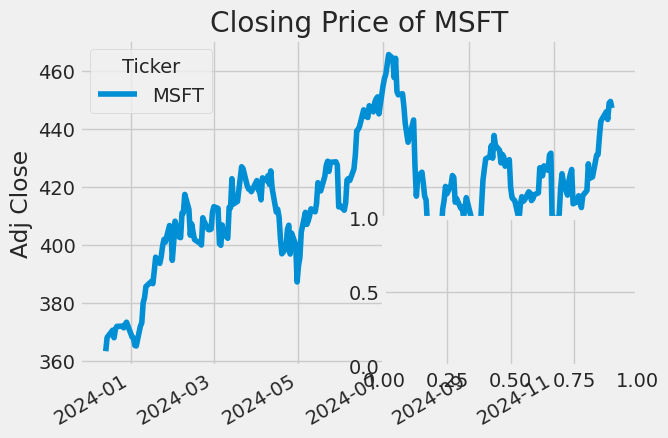

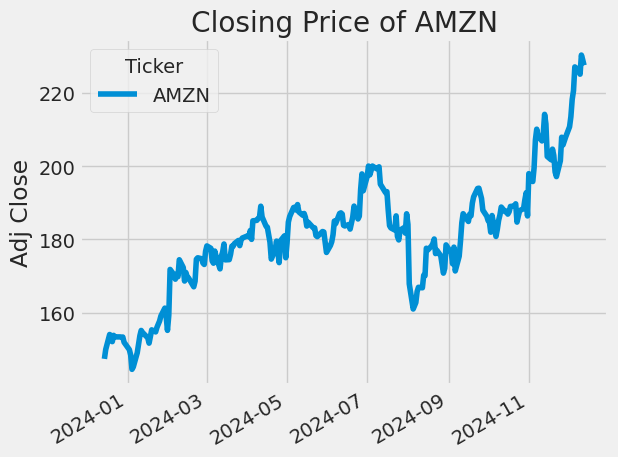

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


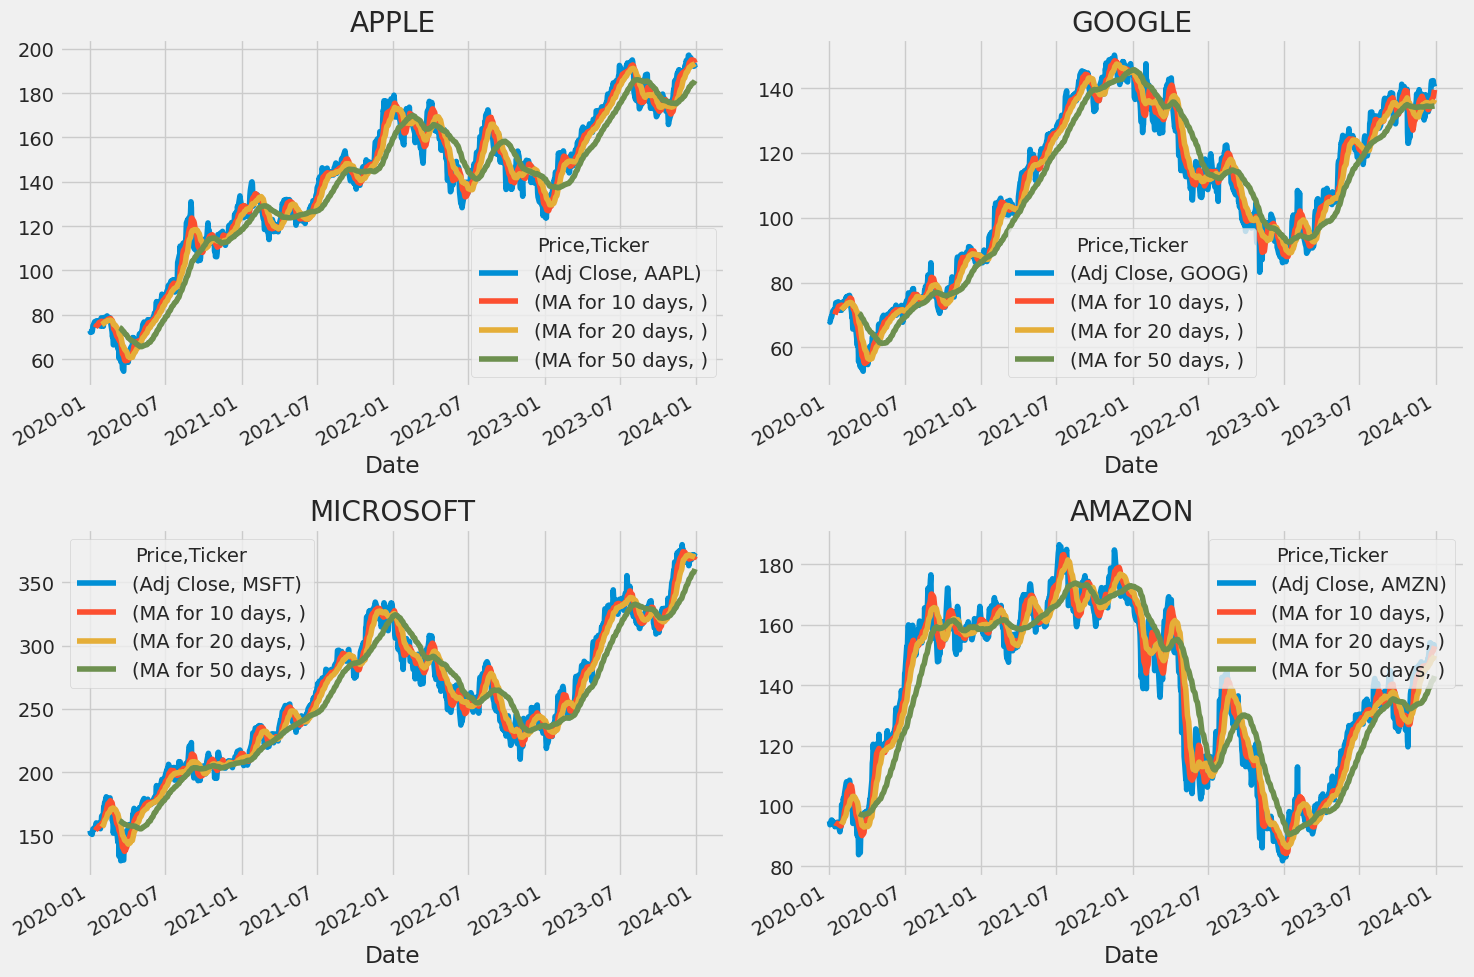

In [ ]:
company_data = {}
for stock in tech_list:
    company_data[stock] = yf.download(stock, start=start, end=end)

# Moving Average Days
ma_day = [10, 20, 50]

# Add moving average columns to each company's data
for ma in ma_day:
    for stock in tech_list:
        column_name = f"MA for {ma} days"
        company_data[stock][column_name] = company_data[stock]['Adj Close'].rolling(ma).mean()

# Plotting the data
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Apple
company_data['AAPL'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

# Google
company_data['GOOG'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

# Microsoft
company_data['MSFT'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

# Amazon
company_data['AMZN'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.show()